In [4]:
%matplotlib inline

In [5]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib
import os

In [6]:
# don't use default na, this erroneously converts 'NA' (iso code for Namibia) to a missing value
# I manually input all the default na vals except for 'NA' to prevent this
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
hatch_v2 = pd.read_csv('all_tech_version 2.0.csv', keep_default_na=False, 
                       na_values=['-1.#IND', '1.#QNAN', '1.#IND', '-1.#QNAN', '#N/A N/A', '#N/A', 'N/A', 'n/a', 
                                  '<NA>', '#NA', 'NULL', 'null', 'NaN', '-NaN', 'nan', '-nan', 'None', ''])

In [7]:
# we just want to test cost data
hatch_v2_cost = hatch_v2[(hatch_v2['Metric']=='Levelized Cost of Energy') | (hatch_v2['Metric']=='Price') | (hatch_v2['Metric']=='Total Installed Cost')]
hatch_v2_cost.reset_index(drop=True, inplace=True)

In [8]:
tech_cost_list = set(hatch_v2_cost['Technology Name'])
len(tech_cost_list)

105

In [9]:
hatch_v2_cost_world = hatch_v2_cost[(hatch_v2_cost['Country Name']=='World') & (hatch_v2_cost['Metric']!='Total Installed Cost')]
hatch_v2_cost_world.reset_index(drop=True, inplace=True)
hatch_v2_cost_world


,ID,Spatial Scale,Country Code,Country Name,Technology Name,Metric,Unit,Data Source,Long Technology Name,1700,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,Unnamed: 0
0,Gold Production_Price_World,Global,World,World,Gold Production,Price,2022 USD/metric ton,USGS,Price|Gold Production,NaN,...,4.566428e+07,4.481864e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Caprolactam_Price_World,Global,World,World,Caprolactam,Price,2022 USD/lb,PCDB,Price|Caprolactam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Low-Density Polyethylene_Price_World,Global,World,World,Low-Density Polyethylene,Price,2022 USD/lb,PCDB,Price|Low-Density Polyethylene,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Titanium Sponge_Price_World,Global,World,World,Titanium Sponge,Price,2022 USD/lb,PCDB,Price|Titanium Sponge,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Capillary DNA Sequencing_Price_World,Global,World,World,Capillary DNA Sequencing,Price,USD/kilobase,PCDB,Price|Capillary DNA Sequencing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Bioenergy_Levelized Cost of Energy_World,Global,World,World,Bioenergy,Levelized Cost of Energy,2022 USD/kWh,IRENA,Levelized Cost of Energy|Bioenergy,NaN,...,7.602939e-02,5.922345e-02,0.068394,0.077530,0.072042,NaN,NaN,NaN,NaN,NaN
72,Geothermal Energy_Levelized Cost of Energy_World,Global,World,World,Geothermal Energy,Levelized Cost of Energy,2022 USD/kWh,IRENA,Levelized Cost of Energy|Geothermal Energy,NaN,...,7.586587e-02,7.229951e-02,0.072002,0.058051,0.072334,NaN,NaN,NaN,NaN,NaN
73,Polystyrene_Price_World,Global,World,World,Polystyrene,Price,2022 USD/lb,PCDB,Price|Polystyrene,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,Phenol_Price_World,Global,World,World,Phenol,Price,2022 USD/lb,PCDB,Price|Phenol,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
def hatch_plot(df, idx, entity):
    tech_name = df.iloc[idx]['Technology Name']
    unit = df.iloc[idx]['Unit']
    tech_series = df.iloc[idx][9:]
    tech_series.dropna(how='all', inplace=True)
    ax = tech_series.plot.line()
    ax.set_title(tech_name + ' (' + entity +')')
    ax.set_ylabel(unit)
    ax.set_ylim(ymin=0)
    file_name = 'visualize/cost visuals/' + tech_name + '.png'
    matplotlib.pyplot.savefig(file_name)
    # line below is needed to clear axes
    # without it the loop will write over the same graph and try to plot 100 lines on one graph
    matplotlib.pyplot.cla()

In [11]:
world_cost = set(hatch_v2_cost_world['Technology Name'])
len(world_cost)

76

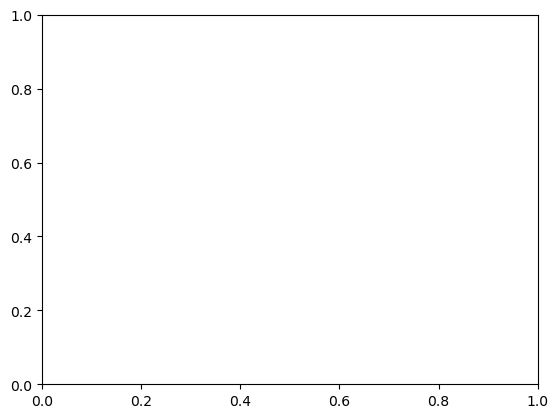

In [12]:
for idx in range(len(hatch_v2_cost_world)):
    hatch_plot(hatch_v2_cost_world, idx, 'World')

In [13]:
no_world_data = list(tech_cost_list - world_cost)
len(no_world_data)

29

In [14]:
idx_world = []
for idx in range(len(hatch_v2_cost)):
    tech = hatch_v2_cost['Technology Name'].iloc[idx]
    if tech not in no_world_data:
        idx_world.append(idx)
hatch_v2_cost_no_world = hatch_v2_cost.drop(idx_world)
len(set(hatch_v2_cost_no_world['Technology Name']))

29

In [15]:
hatch_v2_cost_us = hatch_v2_cost_no_world[hatch_v2_cost_no_world['Country Code']=='US']
hatch_v2_cost_us.reset_index(drop=True, inplace=True)
hatch_v2_cost_us

,ID,Spatial Scale,Country Code,Country Name,Technology Name,Metric,Unit,Data Source,Long Technology Name,1700,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,Unnamed: 0
0,Natural Gas Production_Price_US,National,US,US,Natural Gas Production,Price,USD/million Btu,BP,Price|Natural Gas Production,NaN,...,2.960584,3.116446,2.5119,1.988582,3.839473,NaN,NaN,NaN,NaN,NaN
1,Electric Water Heaters and Immersion Heaters_P...,National,US,United States of America,Electric Water Heaters and Immersion Heaters,Price,million USD/unit,UN Industrial Commodity Statistics Database,Price|Electric Water Heaters and Immersion Hea...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Household Washing and Drying Machines_Price_US,National,US,United States of America,Household Washing and Drying Machines,Price,thousand USD/unit,UN Industrial Commodity Statistics Database,Price|Household Washing and Drying Machines,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Microwave Ovens_Price_US,National,US,United States of America,Microwave Ovens,Price,thousand USD/unit,UN Industrial Commodity Statistics Database,Price|Microwave Ovens,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Combined Refrigerators-Freezers_Price_US,National,US,United States of America,Combined Refrigerators-Freezers,Price,million USD/unit,UN Industrial Commodity Statistics Database,Price|Combined Refrigerators-Freezers,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
us_cost = set(hatch_v2_cost_us['Technology Name'])
len(us_cost)

5

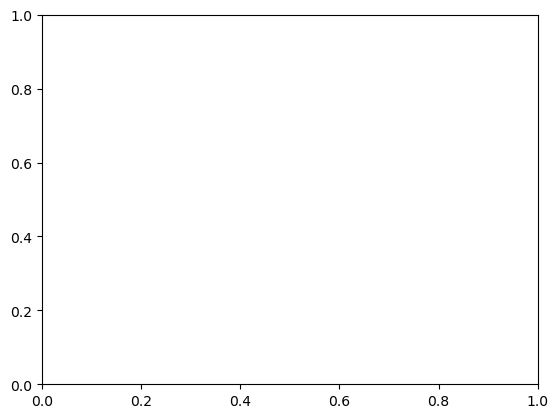

In [17]:
for idx in range(len(hatch_v2_cost_us)):
    hatch_plot(hatch_v2_cost_us, idx, 'US')

In [18]:
no_world_or_us_data = list(tech_cost_list - world_cost - us_cost)
len(no_world_or_us_data)

24

In [19]:
idx_world_us = []
for idx in range(len(hatch_v2_cost)):
    tech = hatch_v2_cost['Technology Name'].iloc[idx]
    if tech not in no_world_data or tech not in no_world_or_us_data:
        idx_world_us.append(idx)
hatch_v2_cost_no_world_or_us = hatch_v2_cost.drop(idx_world_us)

In [20]:
hatch_v2_cost_gb = hatch_v2_cost_no_world_or_us[hatch_v2_cost_no_world_or_us['Country Code']=='GB']
hatch_v2_cost_gb.reset_index(drop=True, inplace=True)
hatch_v2_cost_gb

,ID,Spatial Scale,Country Code,Country Name,Technology Name,Metric,Unit,Data Source,Long Technology Name,1700,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,Unnamed: 0
0,Radio Receivers_Price_GB,National,GB,United Kingdom,Radio Receivers,Price,thousand USD/unit,UN Industrial Commodity Statistics Database,Price|Radio Receivers,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Caustic Soda_Price_GB,National,GB,United Kingdom,Caustic Soda,Price,thousand USD/metric ton,UN Industrial Commodity Statistics Database,Price|Caustic Soda,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bicycles and Other Cycles_Price_GB,National,GB,United Kingdom,Bicycles and Other Cycles,Price,thousand USD/unit,UN Industrial Commodity Statistics Database,Price|Bicycles and Other Cycles,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turbo-Jets of a Thrust Not Exceeding 25 kN_Pri...,National,GB,United Kingdom,Turbo-Jets of a Thrust Not Exceeding 25 kN,Price,million USD/unit,UN Industrial Commodity Statistics Database,Price|Turbo-Jets of a Thrust Not Exceeding 25 kN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Telephones and Videophones_Price_GB,National,GB,United Kingdom,Telephones and Videophones,Price,thousand USD/unit,UN Industrial Commodity Statistics Database,Price|Telephones and Videophones,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Synthetic Filament Tow and Staple Fibers_Price_GB,National,GB,United Kingdom,Synthetic Filament Tow and Staple Fibers,Price,thousand USD/metric ton,UN Industrial Commodity Statistics Database,Price|Synthetic Filament Tow and Staple Fibers,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Household Refrigerators and Freezers_Price_GB,National,GB,United Kingdom,Household Refrigerators and Freezers,Price,thousand USD/unit,UN Industrial Commodity Statistics Database,Price|Household Refrigerators and Freezers,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Beer_Price_GB,National,GB,United Kingdom,Beer,Price,thousand USD/hectolitre,UN Industrial Commodity Statistics Database,Price|Beer,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Refined Copper_Price_GB,National,GB,United Kingdom,Refined Copper,Price,thousand USD/metric ton,UN Industrial Commodity Statistics Database,Price|Refined Copper,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Air Conditioning Machines_Price_GB,National,GB,United Kingdom,Air Conditioning Machines,Price,thousand USD/unit,UN Industrial Commodity Statistics Database,Price|Air Conditioning Machines,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
gb_cost = set(hatch_v2_cost_gb['Technology Name'])
len(gb_cost)

13

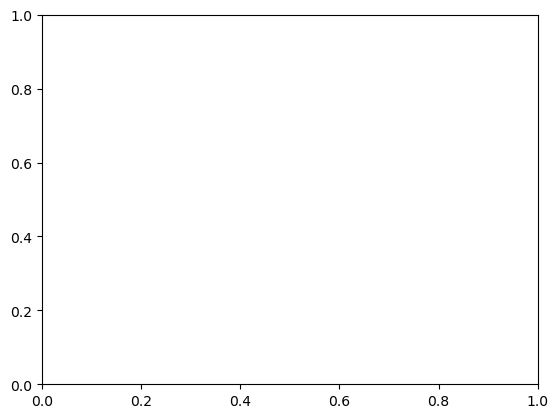

In [22]:
for idx in range(len(hatch_v2_cost_gb)):
    hatch_plot(hatch_v2_cost_gb, idx, 'UK')

In [23]:
no_world_us_or_gb_data = list(tech_cost_list - world_cost - us_cost - gb_cost)
no_world_us_or_gb_data

['Television Receivers',
 'Coal Production',
 'Soybean Production',
 'Liquefied Natural Gas (LNG)',
 "Cow's Milk Production",
 'Corn Production',
 'Potassic Fertilizers',
 'Synthetic Filament Yarn',
 'Motorcycles and Scooters',
 'Cotton Seed Production',
 'Sugar Cane Production']

In [24]:
idx_world_us_gb = []
for idx in range(len(hatch_v2_cost)):
    tech = hatch_v2_cost['Technology Name'].iloc[idx]
    if tech not in no_world_data or tech not in no_world_or_us_data or tech not in no_world_us_or_gb_data:
        idx_world_us.append(idx)
hatch_v2_cost_no_world_us_or_gb = hatch_v2_cost.drop(idx_world_us)
hatch_v2_cost_jp = hatch_v2_cost_no_world_us_or_gb[hatch_v2_cost_no_world_us_or_gb['Country Code']=='JP']
hatch_v2_cost_jp.reset_index(drop=True, inplace=True)
hatch_v2_cost_jp

,ID,Spatial Scale,Country Code,Country Name,Technology Name,Metric,Unit,Data Source,Long Technology Name,1700,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,Unnamed: 0
0,Sugar Cane Production_Price_JP,National,JP,Japan,Sugar Cane Production,Price,2022 USD/tonne,FAOSTAT,Price|Sugar Cane Production,NaN,...,240.411713,232.511429,238.223942,246.367312,243.571827,NaN,NaN,NaN,NaN,NaN
1,Television Receivers_Price_JP,National,JP,Japan,Television Receivers,Price,million USD/unit,UN Industrial Commodity Statistics Database,Price|Television Receivers,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Synthetic Filament Yarn_Price_JP,National,JP,Japan,Synthetic Filament Yarn,Price,thousand USD/metric ton,UN Industrial Commodity Statistics Database,Price|Synthetic Filament Yarn,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Soybean Production_Price_JP,National,JP,Japan,Soybean Production,Price,2022 USD/tonne,FAOSTAT,Price|Soybean Production,NaN,...,1368.450697,1267.083978,1437.000851,1688.351419,1599.260526,NaN,NaN,NaN,NaN,NaN
4,Liquefied Natural Gas (LNG)_Price_JP,National,JP,Japan,Liquefied Natural Gas (LNG),Price,USD/million Btu,BP,Price|Liquefied Natural Gas (LNG),NaN,...,8.098270,10.066989,9.944666,7.781412,10.072739,NaN,NaN,NaN,NaN,NaN
5,Cow's Milk Production_Price_JP,National,JP,Japan,Cow's Milk Production,Price,2022 USD/tonne,FAOSTAT,Price|Cow's Milk Production,NaN,...,1109.564474,1134.845382,1170.700516,1200.964680,1160.612461,NaN,NaN,NaN,NaN,NaN


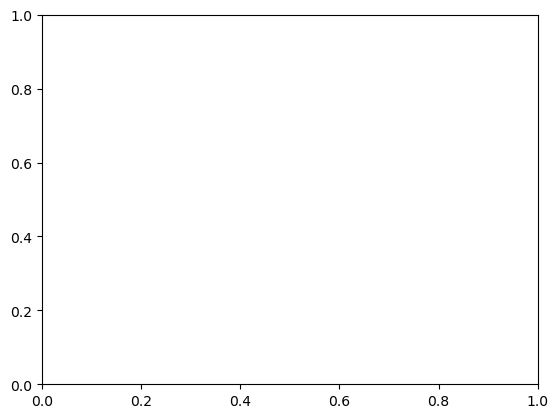

In [25]:
for idx in range(len(hatch_v2_cost_jp)):
    hatch_plot(hatch_v2_cost_jp, idx, 'Japan')

In [26]:
hatch_v2_cost_br = hatch_v2_cost_no_world_us_or_gb[((hatch_v2_cost_no_world_us_or_gb['Technology Name']=='Potassic Fertilizers') | (hatch_v2_cost_no_world_us_or_gb['Technology Name']=='Motorcycles and Scooters')) & (hatch_v2_cost_no_world_us_or_gb['Country Code']=='BR')]
hatch_v2_cost_br.reset_index(drop=True, inplace=True)
hatch_v2_cost_br

,ID,Spatial Scale,Country Code,Country Name,Technology Name,Metric,Unit,Data Source,Long Technology Name,1700,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,Unnamed: 0
0,Potassic Fertilizers_Price_BR,National,BR,Brazil,Potassic Fertilizers,Price,thousand USD/metric ton,UN Industrial Commodity Statistics Database,Price|Potassic Fertilizers,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Motorcycles and Scooters_Price_BR,National,BR,Brazil,Motorcycles and Scooters,Price,thousand USD/unit,UN Industrial Commodity Statistics Database,Price|Motorcycles and Scooters,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


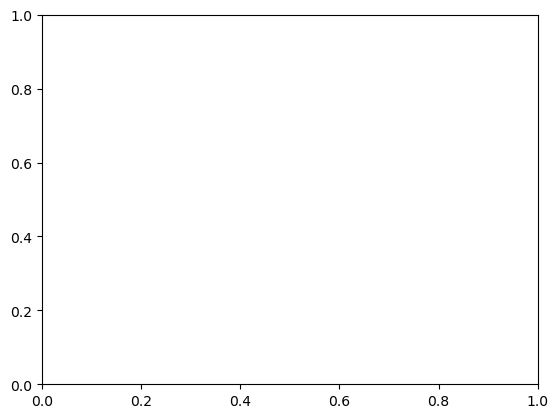

In [27]:
for idx in range(len(hatch_v2_cost_br)):
    hatch_plot(hatch_v2_cost_br, idx, 'Brazil')

In [28]:
hatch_v2_coal = hatch_v2_cost_no_world_us_or_gb[(hatch_v2_cost_no_world_us_or_gb['Technology Name']=='Coal Production') & (hatch_v2_cost_no_world_us_or_gb['Country Name']=='North America')]
hatch_v2_coal.reset_index(drop=True, inplace=True)
hatch_v2_coal

,ID,Spatial Scale,Country Code,Country Name,Technology Name,Metric,Unit,Data Source,Long Technology Name,1700,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,Unnamed: 0
0,Coal Production_Price_North America,National,North America,North America,Coal Production,Price,USD/metric ton,BP,Price|Coal Production,NaN,...,63.82529,72.844012,57.163984,42.76637,68.538142,NaN,NaN,NaN,NaN,NaN


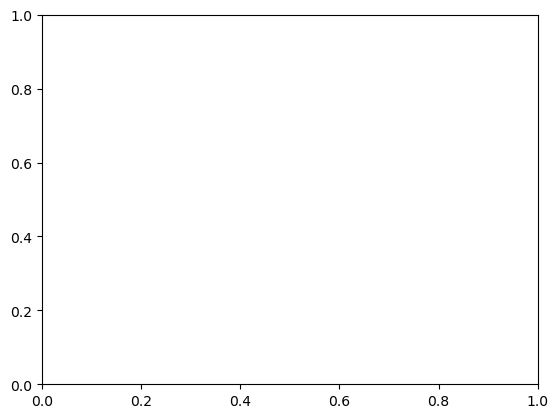

In [29]:
for idx in range(len(hatch_v2_coal)):
    hatch_plot(hatch_v2_coal, idx, 'North America')

In [30]:
len(os.listdir('visualize/cost visuals'))

105